In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("C:/Users/dario/OneDrive/Escritorio/Unab/Inferencia y Patrones/Comisión 2 Florencia Statti/TP2/inferencia_estadistica_tp2/data/planets.csv")
df.head()

,mass,period,eccen
0,0.120,4.950,0.00
1,0.197,3.971,0.00
2,0.210,44.280,0.34
3,0.220,75.800,0.28
4,0.230,6.403,0.08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    101 non-null    float64
 1   period  101 non-null    float64
 2   eccen   101 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


a) Cuando las variables estan en escalas muy diferentes, se necesitara usar alguna 
forma de estandarizacion. Realizar un grafico tridimensional usando las observaciones escaladas.

In [9]:
ss = StandardScaler()
df_standard = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
df_standard

,mass,period,eccen
0,-0.875749,-0.760951,-1.341363
1,-0.854724,-0.762077,-1.341363
2,-0.851175,-0.715714,0.278482
3,-0.848444,-0.679459,-0.007373
4,-0.845714,-0.759280,-0.960223
...,...,...,...
96,2.176948,1.751144,0.278482
97,2.362622,0.623948,0.421410
98,3.023403,-0.756951,-0.021666
99,3.706027,1.234129,-0.255114


In [22]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen', color=etiquetas,)
fig.update_layout(title='Visualización 3D de los exoplanetas estandarizados')
fig.show()

b) Aplicar, a los datos escalados, el comando kmeans usando 4 centroides (de manera
 aleatoria) y obtener el valor mınimo de la funcion objetivo. Inspeccionar visualmente
 los agrupamientos generados.

In [48]:
kmeans = KMeans(n_clusters=4, init = "random", n_init=10, random_state=i)
kmeans.fit(df_standard)
centroides=kmeans.cluster_centers_
etiquetas=kmeans.labels_
print(f"El valor mínimo de la función objetivo es: {kmeans.inertia_}")


El valor mínimo de la función objetivo es: 110.60613395836832


In [49]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen',color=etiquetas,title='Visualización 3D de los exoplanetas estandarizados')
fig.add_trace(go.Scatter3d(
    x=centroides[:, 0],
    y=centroides[:, 1],
    z=centroides[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='diamond'),
    name='Centroides'
))
fig.show()

c) Repetir el ıtem anterior varias veces y comparar.

In [51]:
seed = range(5)
centroides_rep = []
etiquetas_rep = []
for i in seed:
    kmeans = KMeans(n_clusters=4, init = "random", n_init=10, random_state=i)
    kmeans.fit(df_standard)
    centroides_rep.append(kmeans.cluster_centers_)
    etiquetas_rep.append(kmeans.labels_)
    print(f"\nPara la semilla n°{i}, el valor mínimo de la función objetivo es: {kmeans.inertia_}")
    print("******"*10)


Para la semilla n°0, el valor mínimo de la función objetivo es: 111.09582476404076
************************************************************

Para la semilla n°1, el valor mínimo de la función objetivo es: 110.64289088429769
************************************************************

Para la semilla n°2, el valor mínimo de la función objetivo es: 110.64289088429769
************************************************************

Para la semilla n°3, el valor mínimo de la función objetivo es: 110.59264507150014
************************************************************

Para la semilla n°4, el valor mínimo de la función objetivo es: 110.64289088429769
************************************************************


In [59]:
"""fig = plt.figure(figsize=(20, 5))
for idx, i in enumerate(seed):
    ax = fig.add_subplot(1, len(seed), idx+1, projection='3d')
    ax.scatter(df_standard.iloc[:,0], df_standard.iloc[:,1], df_standard.iloc[:,2],
               c=etiquetas_rep[idx], cmap='viridis', alpha=0.6)
    ax.scatter(centroides_rep[idx][:,0], centroides_rep[idx][:,1], centroides_rep[idx][:,2],
               c='red', marker='X', s=100, label='Centroides')
    ax.set_title(f'Semilla {i}')
    ax.set_xlabel(df_standard.columns[0])
    ax.set_ylabel(df_standard.columns[1])
    ax.set_zlabel(df_standard.columns[2])
    ax.legend()

plt.tight_layout()
plt.show()"""

"fig = plt.figure(figsize=(20, 5))\nfor idx, i in enumerate(seed):\n    ax = fig.add_subplot(1, len(seed), idx+1, projection='3d')\n    ax.scatter(df_standard.iloc[:,0], df_standard.iloc[:,1], df_standard.iloc[:,2],\n               c=etiquetas_rep[idx], cmap='viridis', alpha=0.6)\n    ax.scatter(centroides_rep[idx][:,0], centroides_rep[idx][:,1], centroides_rep[idx][:,2],\n               c='red', marker='X', s=100, label='Centroides')\n    ax.set_title(f'Semilla {i}')\n    ax.set_xlabel(df_standard.columns[0])\n    ax.set_ylabel(df_standard.columns[1])\n    ax.set_zlabel(df_standard.columns[2])\n    ax.legend()\n\nplt.tight_layout()\nplt.show()"

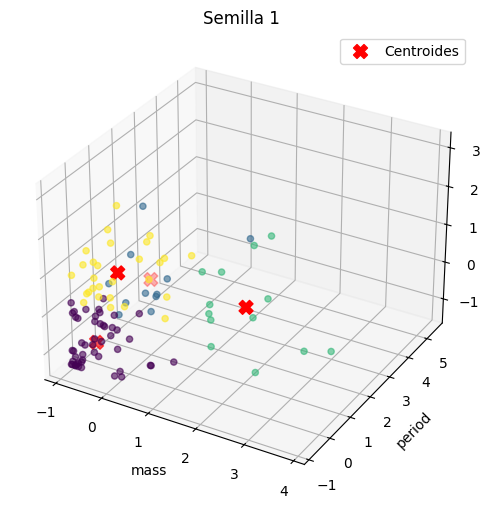

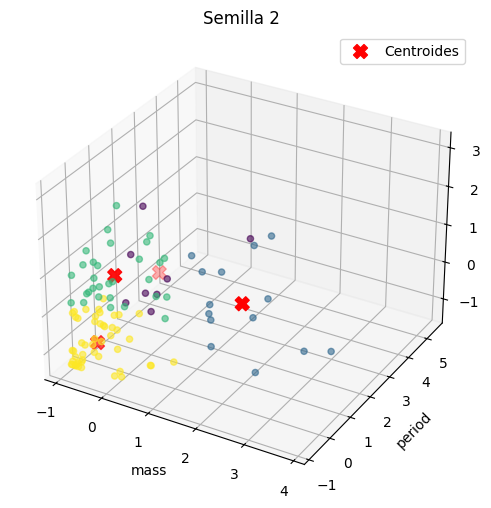

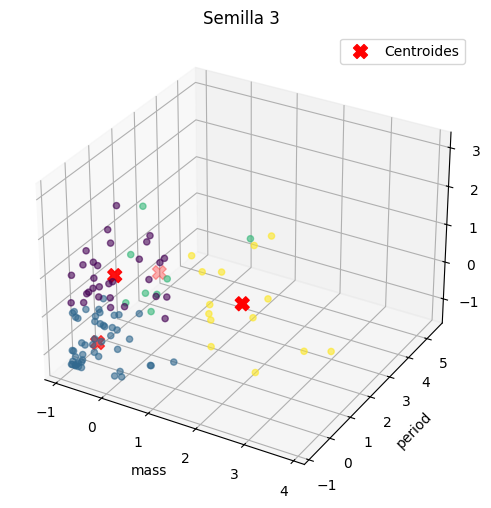

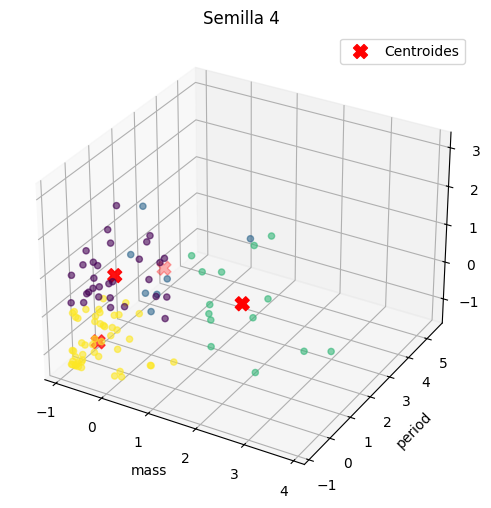

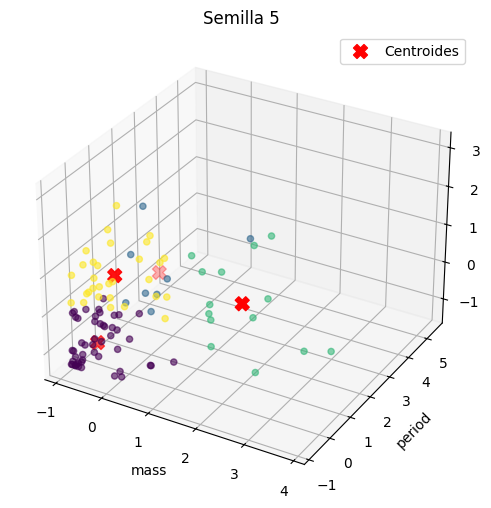

In [54]:
for idx, i in enumerate(seed):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(df_standard.iloc[:,0], df_standard.iloc[:,1], df_standard.iloc[:,2],
               c=etiquetas_rep[idx], cmap='viridis', alpha=0.6)
    
    ax.scatter(centroides_rep[idx][:,0], centroides_rep[idx][:,1], centroides_rep[idx][:,2],
               c='red', marker='X', s=100, label='Centroides')
    
    ax.set_title(f'Semilla {i+1}')
    ax.set_xlabel(df_standard.columns[0])
    ax.set_ylabel(df_standard.columns[1])
    ax.set_zlabel(df_standard.columns[2])
    ax.legend()
    plt.show()

d) Ejecutar el metodo K-medias eligiendo los centroides a partir de algun criterio.

In [64]:
pruebas = range(10)
minimos = []

for i in pruebas:
    kmeans = KMeans(n_clusters=i+1, init = "random", n_init=10, random_state=42)
    kmeans.fit(df_standard)
    minimos.append(kmeans.inertia_)
    print(f"\nPara {i+1} grupos, el valor mínimo de la función objetivo es: {kmeans.inertia_}")
    print("******"*10)


Para 1 grupos, el valor mínimo de la función objetivo es: 303.0
************************************************************

Para 2 grupos, el valor mínimo de la función objetivo es: 194.5926886632576
************************************************************

Para 3 grupos, el valor mínimo de la función objetivo es: 145.01438207715273
************************************************************

Para 4 grupos, el valor mínimo de la función objetivo es: 110.60613395836832
************************************************************

Para 5 grupos, el valor mínimo de la función objetivo es: 92.01296341524241
************************************************************

Para 6 grupos, el valor mínimo de la función objetivo es: 78.35707793199072
************************************************************

Para 7 grupos, el valor mínimo de la función objetivo es: 64.90963355068811
************************************************************

Para 8 grupos, el valor mínimo de la funció

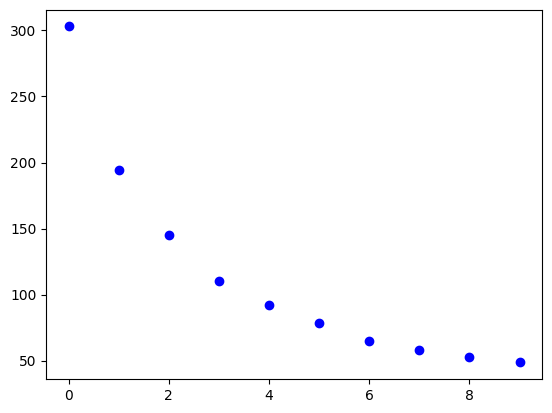

In [63]:
plt.scatter(pruebas, minimos, color='blue')

 e) Aplicar el metodo K-medoides utilizando el comando pam del paquete cluster.

 f ) Utilizar el metodo del codo para identificar la cantidad de clusters en cada uno de los
 metodos. ¿Cuantos grupos le sugiere?

 g) Utilizar el metodo Silhouette para identificar la cantidad de clusters en cada uno de
 los metodos. ¿Cuantos grupos le sugiere?
 
 h) Concluir